## 1. Proving that the Hat Matrix is Symmetric

The **Hat matrix**  is used in linear regression to project observed values onto the space 
spanned by the predictor variables. 
The **Hat matrix** `H` is defined as:

$H = X (X^T)^{-1} X^T$


where:

- X is the **design matrix**,
- $ X^T $ is the **transpose** of `X`, and
- $ (X^T X)^{-1} $ is the **inverse** of $ X^T X $.

To prove that `H` is **symmetric**, we need to show that:


$ H^T = H $


Let's take the transpose of `H`:

$ H^T = (X (X^T X)^{-1} X^T)^T $

Using the **transpose rule** for matrix multiplication $ (ABC)^T = C^T B^T A^T $, we get:


$ H^T = X (X^T X)^{-1} X^T $


Since:

1. $ (X^T)^T = X $ (transpose of a transpose is the original matrix).
2. $ (X^T X)^{-1} $ is symmetric because the inverse of a symmetric matrix is also symmetric.

We see that:

$ H^T = H $

Thus, the **Hat matrix is symmetric**.

## 2. Proving that the Hat Matrix is Idempotent

A matrix is **idempotent** if:

$ H^2 = H $

This means that if we apply the transformation represented by H twice, the result remains the same as applying it once.

Expanding $ H^2 $:


$ H^2 = H \cdot H $

Let's substitute `H`:


$ H^2 = (X (X^T X)^{-1} X^T) \cdot (X (X^T X)^{-1} X^T) $


Let's rearrange the terms for better visibility:


$ H^2 = X (X^T X)^{-1} X^T X (X^T X)^{-1} X^T $


Since $ X^T X (X^T X)^{-1} = I $ (identity matrix), we simplify:


$ H^2 = X (X^T X)^{-1} X^T = H $


Thus, **the Hat matrix is idempotent**.



## 3. Linear regression curves

$  y = \displaystyle\sum_{i=0}^{n} a_i x^i  \\ $ 
Yes. This function is polynomial. It remains linear in the uknown parameters $ a_i $. It can be estimated using linear regression.

$ y = ax + b \cdot \sin(x) + c \cdot \log(x) + d  \\ $ 
Yes, this trigonometric and logarithmic function can be estimated using linear regression. This equation remain linear in the unknown coefficients $ a, b, c, d $.

$  y = ae^{(bx)}  \\ $ 
No. Exponential functions cannot be estimated using linear regression. However, this can be written as $ \log(y) = \log(a) + bx $ and this can be estimated using linear regression.

$ y = ax + bx + c \\ $ 
Yes, this can be estimated using linear regression. This can be written as $ y = (a + b)x + c $ , this ensures that the function remains linear in the parameters, and no redefinition of variables is needed.


$ y = (ax + b) / (cx + d) \\ $ 
No. This rational function cannot be estimated using linear regression. The denominator contains uknown coefficients c and d, making it non-linear in the parameters. Rational functions introduce non-linearity in the unknowns.
 



## 4. Simple housing dataset



In [38]:
import numpy as np

# Training data
X_train = np.array([
    [1, 1500, 1, 0, 0],
    [1, 2000, 0, 1, 0],
    [1, 1800, 0, 0, 1],
    [1, 2200, 1, 0, 0],
    [1, 1700, 0, 1, 0],
    [1, 2000, 0, 0, 1]
])

y_train = np.array([350000, 400000, 300000, 450000, 370000, 320000])

# Computing Hat matrix
XT_X_inv = np.linalg.inv(X_train.T @ X_train)
H = X_train @ XT_X_inv @ X_train.T

# Predicting using the Hat matrix
y_hat_train = H @ y_train
print("Predicted prices for training data:", y_hat_train)

# Test data
X_test = np.array([
    [1, 1900, 1, 0, 0],
    [1, 1600, 0, 1, 0],
    [1, 2100, 0, 0, 1]
])

# Compute coefficients (β) for prediction
beta = XT_X_inv @ X_train.T @ y_train

# Prediction for test data
y_hat_test = X_test @ beta
print("Predicted prices for test data:", y_hat_test)

Predicted prices for training data: [ -276129.03225809  1195483.87096774  -710322.58064517 -1143870.96774193
   164516.12903224  -239677.41935483]
Predicted prices for test data: [-510932.13795452  920267.67330146 -588398.67879184]


The binary features (is_urban, is_suburban, is_rural) are linearly dependent because they always sum to 1. If we drop one of the binary features, the remaining two features would have been sufficient. 

The Size (sq. ft) feature ranges from 1500 to 2200, while the binary features take values of 0 or 1. So this large difference in scale causes numarical instability when inverting $ X^TX  $. I would standardize the Size column to have a mean of 0 and a standard deviation of 1. 

I observe unrealistic predictions after calculating the Hat matrix. The predictions include negative numbers and very large values that are not consistent with the actual test values. This poor performance suggests that the Hat matrix is sensitive to the dataset's issues like multicollinearity and poor scaling. 

In [39]:
from sklearn.linear_model import LinearRegression
# Train a regression model using scikit-learn
reg = LinearRegression()
reg.fit(X_train[:, 1:], y_train)  # Drop the intercept column for sklearn

# Predict for test data
y_pred_test = reg.predict(X_test[:, 1:])  # Drop the intercept column for sklearn
print("Predicted prices for test data using scikit-learn:", y_pred_test)


Predicted prices for test data using scikit-learn: [406693.5483871  351532.25806452 336774.19354839]


Hat matrix prediction: [-510932.13795452  920267.67330146 -588398.67879184] $\\$
Scikit-learn prediction: [406693.5483871  351532.25806452 336774.19354839] $\\$
The asnwers from the Hat matrix approach do not match the Scikit-learn model's asnwer. 
The binary features (is_urban, is_suburban, is_rural) are linearly dependent and makes $ X^TX $ nearly singular. This results in numerical instability when calculating $ (X^TX)^{-1} \\ $
The $ Size $ feature has a larger magnitude compared to the binary features and thus leads to skewed predictions. 
Scikit-learn, however, uses numerically stable methods to compute regression coefficients.


In [40]:
from sklearn.metrics import r2_score
# Reshape the true values to match the shape of y_pred_test
true_values = np.array([420000, 360000, 330000])
# Evaluating scikit-learn's regression model
r2 = r2_score(true_values, y_pred_test)
print(r2)

0.9298442842277389


## 5. Delivery time prediction

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

train_data = pd.read_csv('deliverytimeprediction_train.csv')
test_data = pd.read_csv('deliverytimeprediction_test.csv')
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [42]:
# Convert boolean values to integers
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Add an intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit OLS Regression Model
model = sm.OLS(y_train, X_train).fit()

# Compute Hat Matrix (for training data)
XTX_inv = np.linalg.inv(X_train.T @ X_train)
H_train = X_train @ XTX_inv @ X_train.T

# Extract leverage values (diagonal elements of H)
leverage_train = np.diag(H_train)

# Compute residuals for training data
y_pred_train = model.predict(X_train)
residuals_train = y_train - y_pred_train

# Identify high-leverage points
high_leverage_threshold = 2 * (X_train.shape[1]) / X_train.shape[0]  # 2 * (p / n)
high_leverage_points = np.where(leverage_train > high_leverage_threshold)[0]

# Identify large residuals in training set
large_residuals_train = np.where(np.abs(residuals_train) > 2 * residuals_train.std())[0]

print("Leverage Scores (Training):", leverage_train)

Leverage Scores (Training): [0.01625162 0.02025266 0.01627211 0.0156765  0.03057456 0.01667397
 0.03106329 0.01625457 0.01939773 0.01846582 0.0345463  0.01491957
 0.01779681 0.02909732 0.01956296 0.01722316 0.01631803 0.03069324
 0.02478875 0.03704939 0.015353   0.02206573 0.02316128 0.01487044
 0.03612268 0.01631149 0.02930687 0.0263346  0.02975861 0.02713401
 0.02714862 0.02706787 0.01311668 0.01802512 0.02400396 0.01930854
 0.03902571 0.03034933 0.02471594 0.02783117 0.02742393 0.01635953
 0.01872335 0.0141639  0.02183368 0.01470266 0.02639018 0.03462226
 0.01119651 0.01499281 0.01434923 0.02498953 0.0293932  0.02668927
 0.03235664 0.0202874  0.01474856 0.02927817 0.01883451 0.01170843
 0.03144195 0.01868887 0.01653464 0.0252969  0.02740913 0.02167809
 0.03077114 0.02279551 0.02726916 0.0179261  0.01813548 0.01818582
 0.01394238 0.0192667  0.02769353 0.02978224 0.01287972 0.01936273
 0.02542153 0.01292397 0.01813046 0.01739114 0.01214344 0.01516211
 0.03281665 0.01550417 0.02869593 

In [43]:
print("High-Leverage Points (Training):", high_leverage_points)

High-Leverage Points (Training): [249 301]


In [44]:
print("Large Residuals (Training):", large_residuals_train)

Large Residuals (Training): [ 13 115 156 165 198 222 247 359 366 382 391 418 420 484 485 509 534 574
 599 644 645 691 693]


Influence and residuals together provide us with insights into which data points have the most impact on the regression model and whether certain points are outliers or ditort the model. $ \\ $
High leverage or influence points are far from the mean of the predictor variables. These points can significantly change the regression line. $ \\ $
Residual or a prediction error for a point show the difference between actual values and predicted ones. Large residuals mean the model made a significant prediction error for that data point. $ \\ $
Some predictions here are way off, most likely because the model isn't capturing key patterns, like unusual traffic conditions or extreme preparation times. If these points also have high leverage, they might be distorting the model. $ \\ $
To fix this, we could identify outliers, use a more robust regression model, or revisit feature selection to improve accuracy.


## 6. Implementing regression approaches and compare and contrast results

In [45]:
# Load dataset
train_data = pd.read_csv('deliverytimeprediction_train.csv')
test_data = pd.read_csv('deliverytimeprediction_test.csv')

# Split features and target
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Convert boolean values to floats for numerical computation
X_train = X_train.astype(float)
X_test = X_test.astype(float)

## Regression by Successive Orthogonalization

sequentially removes correlation between predictors and targets.

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
train_data = pd.read_csv('deliverytimeprediction_train.csv')
test_data = pd.read_csv('deliverytimeprediction_test.csv')

# Split features and target
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Convert boolean values to floats for numerical computation
X_train = X_train.astype(float)
X_test = X_test.astype(float)

def successive_orthogonalization(X_train, y_train, X_test, y_test):
    """ Performs regression by Successive Orthogonalization. """
    n_samples_train, n_features = X_train.shape
    n_samples_test = X_test.shape[0]

    coefficients = {}  # Store regression coefficients
    residuals = y_train.copy()  # Start with original target values

    feature_names = X_train.columns  
    X_train_np = X_train.values  
    X_test_np = X_test.values  
    y_test_np = y_test.values  

    # Storage for orthogonalized features
    Z_train = np.zeros_like(X_train_np)
    Z_test = np.zeros_like(X_test_np)

    for i in range(n_features):
        feature_name = feature_names[i]
        x_i_train = X_train_np[:, i].copy()
        x_i_test = X_test_np[:, i].copy()  # Keep test feature for transformation

        # Orthogonalization
        for j in range(i):
            x_j_train = Z_train[:, j]  # Use previously orthogonalized feature
            x_j_test = Z_test[:, j]  # Apply same transformation on test data

            # Compute projection coefficient (scalar)
            proj_coeff = np.dot(x_i_train, x_j_train) / np.dot(x_j_train, x_j_train)

            # Apply projection to both train and test
            x_i_train -= proj_coeff * x_j_train
            x_i_test -= proj_coeff * x_j_test  # Ensure correct transformation

        # Store orthogonalized feature
        Z_train[:, i] = x_i_train
        Z_test[:, i] = x_i_test

        # Compute regression coefficient
        coefficient = np.dot(x_i_train, residuals) / np.dot(x_i_train, x_i_train)
        residuals -= coefficient * x_i_train  # Update residuals
        coefficients[feature_name] = coefficient

    # Compute final predictions for test data
    y_pred_test = np.dot(Z_test, np.array(list(coefficients.values())))

    # Evaluate performance
    mse = mean_squared_error(y_test_np, y_pred_test)
    r2 = r2_score(y_test_np, y_pred_test)

    return coefficients, y_pred_test, mse, r2

# Run successive orthogonalization regression
coefficients, y_pred_test, mse, r2 = successive_orthogonalization(X_train, y_train, X_test, y_test)

# Print coefficients
print("\nSuccessive Orthogonalization Coefficients:")
for feature_name, coeff in coefficients.items():
    print(f"Feature: {feature_name}, Coefficient: {coeff:.4f}")

# Print final predictions
print("\nPredicted Delivery Times for Test Data:")
print(y_pred_test)

# Print evaluation metrics
print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared Score: {r2:.4f}")



Successive Orthogonalization Coefficients:
Feature: Distance_km, Coefficient: 5.0363
Feature: Preparation_Time_min, Coefficient: 1.2933
Feature: Courier_Experience_yrs, Coefficient: -0.0409
Feature: Weather_Foggy, Coefficient: 6.2924
Feature: Weather_Rainy, Coefficient: 4.7852
Feature: Weather_Snowy, Coefficient: 9.6200
Feature: Weather_Windy, Coefficient: 5.0494
Feature: Traffic_Level_Low, Coefficient: -6.2648
Feature: Traffic_Level_Medium, Coefficient: -1.5293
Feature: Time_of_Day_Evening, Coefficient: 2.6785
Feature: Time_of_Day_Morning, Coefficient: 3.1431
Feature: Time_of_Day_Night, Coefficient: 2.9864
Feature: Vehicle_Type_Car, Coefficient: 1.4514
Feature: Vehicle_Type_Scooter, Coefficient: 1.0143

Predicted Delivery Times for Test Data:
[ 56.23014193  33.76506748  50.88935481  62.09751402  79.1634922
  43.43177071  73.33844822 100.68730618  52.07913592  44.43577785
  30.45447548  37.55312626  22.89027291  65.5756177   50.80955356
  85.86093968  50.55274784  69.20711269  62.4464

## Lasso Regression
uses L1 regularization, which eliminates less important features by shrinking some coefficients to zero.

In [47]:
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# Define the LassoCV model with cross-validation
lasso_cv = LassoCV(cv=KFold(n_splits=5, shuffle=True, random_state=42), random_state=42)  # 5-fold cross-validation

# Fit the model to the training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha (regularization parameter)
best_alpha = lasso_cv.alpha_
print(f"Best alpha (regularization parameter): {best_alpha:.6f}")

# Fit the final Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_best.predict(X_test)

# Evaluate the model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression Performance:")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# Identify which features are eliminated (coefficients close to zero)
feature_names = X_train.columns
coefficients = lasso_best.coef_

eliminated_features = [feature for feature, coef in zip(feature_names, coefficients) if abs(coef) < 1e-4]
retained_features = [feature for feature, coef in zip(feature_names, coefficients) if abs(coef) >= 1e-4]

print("\nEliminated Features (Regularized to Zero):")
print(eliminated_features)

print("\nRetained Features:")
print(retained_features)

# Print final predictions
print("\nPredicted Delivery Times for Test Data:")
print(y_pred_lasso)


Best alpha (regularization parameter): 0.097073

Lasso Regression Performance:
RMSE: 9.0074
R² Score: 0.8225

Eliminated Features (Regularized to Zero):
['Time_of_Day_Morning', 'Time_of_Day_Night', 'Vehicle_Type_Car']

Retained Features:
['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_Low', 'Traffic_Level_Medium', 'Time_of_Day_Evening', 'Vehicle_Type_Scooter']

Predicted Delivery Times for Test Data:
[55.23365443 34.17921636 46.79325866 67.44691746 77.48319161 52.83649132
 72.95992379 98.34195197 54.20685845 44.25623012 31.26327303 40.90018576
 25.15207744 69.27702157 53.15017728 88.53457797 50.75563797 69.37993888
 62.74919236 76.0066539  53.32650487 84.05361997 76.03512781 65.63137428
 33.16263644 64.76066574 39.22323097 62.7841507  80.36127835 72.8291333
 84.46630082 86.02742739 20.78630688 80.6585118  25.78962425 68.49260353
 36.37055623 59.71372699 85.50172183 37.87929768 56.541657

## Ridge Regression
applies L2 regularization, which shrinks coefficients without eliminating them.

In [48]:
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the RidgeCV model with cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=KFold(n_splits=5, shuffle=True, random_state=42))

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# Get the best alpha (regularization parameter)
best_alpha = ridge_cv.alpha_
print(f"Best alpha (regularization parameter): {best_alpha:.6f}")

# Fit the final Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha, random_state=42)
ridge_best.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_best.predict(X_test)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nRidge Regression Performance:")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

# Compare coefficients of Ridge with Lasso and Successive Orthogonalization
ridge_coefficients = ridge_best.coef_

# Print coefficients in a structured format
print("\nRidge Regression Coefficients:")
for feature, coef in zip(X_train.columns, ridge_coefficients):
    print(f"{feature}: {coef:.4f}")



Best alpha (regularization parameter): 1.000000

Ridge Regression Performance:
RMSE: 9.0474
R² Score: 0.8209

Ridge Regression Coefficients:
Distance_km: 2.9782
Preparation_Time_min: 0.9584
Courier_Experience_yrs: -0.6959
Weather_Foggy: 7.3734
Weather_Rainy: 4.9829
Weather_Snowy: 9.7019
Weather_Windy: 1.8006
Traffic_Level_Low: -12.3500
Traffic_Level_Medium: -6.8151
Time_of_Day_Evening: 1.4281
Time_of_Day_Morning: 0.3685
Time_of_Day_Night: -0.2891
Vehicle_Type_Car: 0.2946
Vehicle_Type_Scooter: -1.1179


In [49]:
# Compute MSE, R^2, and RSS for all models

# Successive Orthogonalization
y_pred_successive = np.dot(X_test, ridge_coefficients)
mse_successive = mean_squared_error(y_test, y_pred_successive)
r2_successive = r2_score(y_test, y_pred_successive)
rss_successive = np.sum((y_test - y_pred_successive) ** 2)

print(f"Successive Orthogonalization - MSE: {mse_successive}, R2: {r2_successive}, RSS: {rss_successive}")

# Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rss_lasso = np.sum((y_test - y_pred_lasso) ** 2)

print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}, RSS: {rss_lasso}")

# Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rss_ridge = np.sum((y_test - y_pred_ridge) ** 2)

print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}, RSS: {rss_ridge}")

Successive Orthogonalization - MSE: 399.6590925022123, R2: 0.12546247305375047, RSS: 119897.72775066367
Lasso Regression - MSE: 81.13287934001247, R2: 0.8224643227611537, RSS: 24339.86380200374
Ridge Regression - MSE: 81.85553782400548, R2: 0.8208829951364995, RSS: 24556.661347201643


## Model Comparison

                          Model  Mean Squared Error (MSE)  R-squared (R²)  \
0  Successive Orthogonalization                399.659093        0.125462   
1              Lasso Regression                 81.132879        0.822464   
2              Ridge Regression                 81.855538        0.820883   

   Residual Sum of Squares (RSS)  
0                  119897.727751  
1                   24339.863802  
2                   24556.661347  


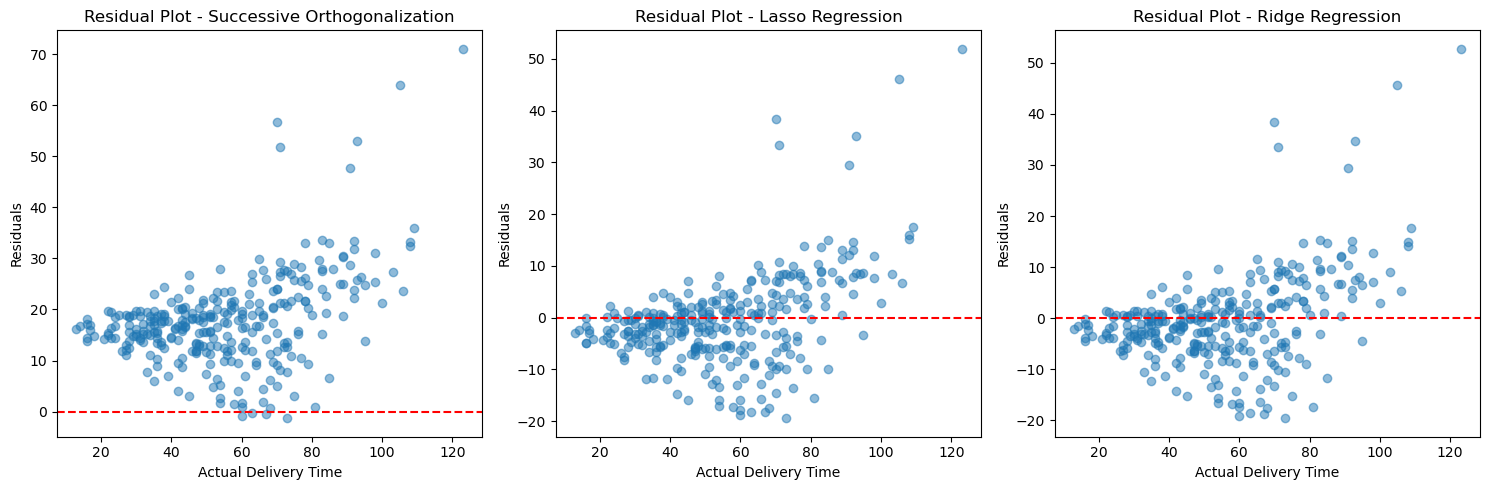

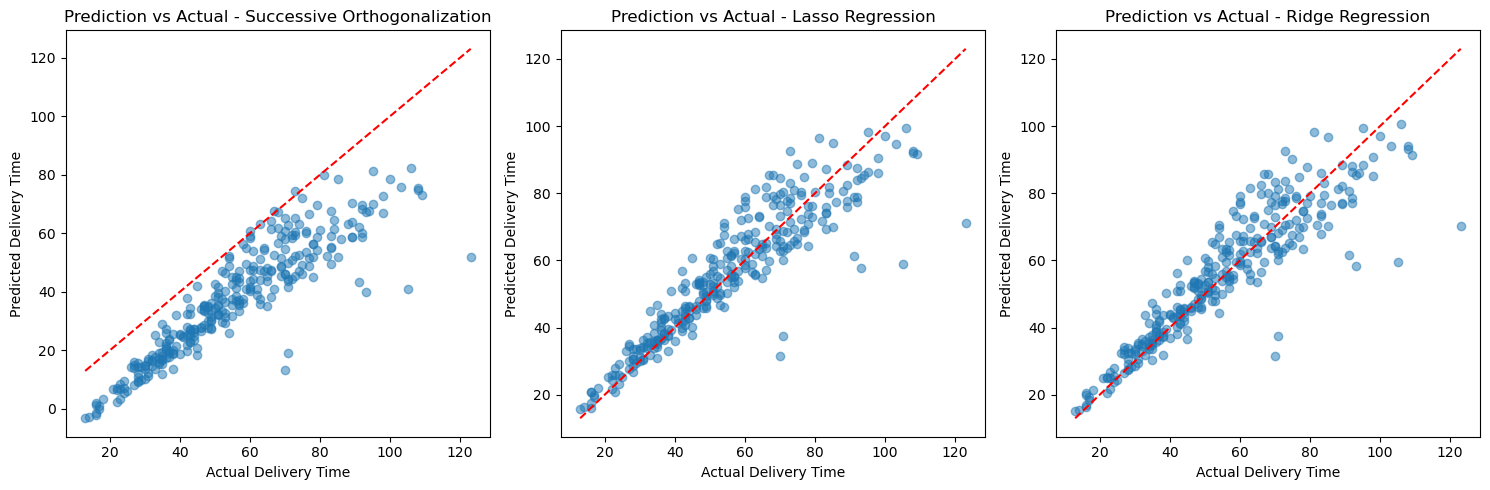

In [51]:
# Define function to calculate RSS
def rss(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Store model predictions and actual values
models = {
    "Successive Orthogonalization": y_pred_successive,
    "Lasso Regression": y_pred_lasso,
    "Ridge Regression": y_pred_ridge
}

# Compute performance metrics
metrics = {
    "Model": [],
    "Mean Squared Error (MSE)": [],
    "R-squared (R²)": [],
    "Residual Sum of Squares (RSS)": []
}

for model_name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rss_val = rss(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Mean Squared Error (MSE)"].append(mse)
    metrics["R-squared (R²)"].append(r2)
    metrics["Residual Sum of Squares (RSS)"].append(rss_val)

# Convert metrics to DataFrame and display
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot residuals for each model
plt.figure(figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    residuals = y_test - y_pred
    plt.scatter(y_test, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Actual Delivery Time")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot - {model_name}")

plt.tight_layout()
plt.show()

# Plot prediction vs actual values for each model
plt.figure(figsize=(15, 5))
for i, (model_name, y_pred) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Ideal prediction line
    plt.xlabel("Actual Delivery Time")
    plt.ylabel("Predicted Delivery Time")
    plt.title(f"Prediction vs Actual - {model_name}")

plt.tight_layout()
plt.show()
